# package use:
numpy
pandas
matplotlib
sklearn
nltk
squarify
autogluon
seaborn
lightgbm
# Enviornment
kernal
Anaconda3 ag Python 3.8.18
Use pip and conda to install packages

# titles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

## Load dataset from local

In [2]:
titles = pd.read_csv("./titles.csv")
credit = pd.read_csv("./credits.csv")
titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


In [3]:
titles.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

# Check Missing value

In [4]:
is_missing = titles.isna().sum()
print(is_missing)

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64


# Data Cleaning
1. Here, there is one missing value in the 'title', which cannot be imputate, so the data without a title is directly deleted.
2. Here, if there are two or more missing values in 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', the entire data entry is directly deleted to prevent the occurrence of anomalous data during subsequent imputation. A total of 89 entries were removed.

In [5]:
titles_clean = titles.dropna(subset=['title'])
titles_clean = titles_clean.dropna(thresh=2, subset=['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'])
titles_clean.drop(['age_certification', 'seasons', 'imdb_id'], axis=1, inplace=True)
titles_clean


,id,title,type,description,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"['drama', 'crime']",['US'],8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['fantasy', 'action', 'comedy']",['GB'],8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"['war', 'action']","['GB', 'US']",7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,30,"['comedy', 'european']",['GB'],8.8,73424.0,17.617,8.306
...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,100,"['romance', 'drama']",['NG'],6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,134,['drama'],[],7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,90,['comedy'],['CO'],3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,37,[],['US'],NaN,NaN,1.296,10.000


# Data imputation
The KNNImputer algorithm is chosen for filling missing values instead of using mean, median, etc., due to its non-parametric approach based on similarity, making it suitable for multi-feature imputation, thereby enhancing data processing flexibility and consistency. Using mean may introduce bias and fail to accurately reflect the true data patterns.

In [6]:
from sklearn.impute import KNNImputer

# create KNNImputer
imputer = KNNImputer(n_neighbors=30)

# the column need to bt imputate
columns_to_impute = ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

# change NaN from original table
titles_clean[columns_to_impute] = imputer.fit_transform(titles_clean[columns_to_impute])

titles_clean

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"['drama', 'crime']",['US'],8.200000,808582.000000,40.965000,8.179000
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],7.700000,107673.000000,10.010000,7.300000
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['fantasy', 'action', 'comedy']",['GB'],8.200000,534486.000000,15.461000,7.811000
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"['war', 'action']","['GB', 'US']",7.700000,72662.000000,20.398000,7.600000
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,30,"['comedy', 'european']",['GB'],8.800000,73424.000000,17.617000,8.306000
...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,100,"['romance', 'drama']",['NG'],6.800000,45.000000,1.466000,6.570000
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,134,['drama'],[],7.700000,348.000000,7.928867,6.841433
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,90,['comedy'],['CO'],3.800000,68.000000,26.005000,6.300000
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,37,[],['US'],6.433333,15655.066667,1.296000,10.000000


In [7]:
titles_clean.isna().sum()

id                       0
title                    0
type                     0
description             10
release_year             0
runtime                  0
genres                   0
production_countries     0
imdb_score               0
imdb_votes               0
tmdb_popularity          0
tmdb_score               0
dtype: int64

# Normalization
Normalize imdb_score, imdb_votes, tmdb_popularity and tmdb_score by using min-max scalling

In [8]:
# create MinMaxScaler
scaler = MinMaxScaler()

# list columns that need to be normalized
columns_to_normalize = ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

# create new column for normalized data
for col in columns_to_normalize:
    new_col_name = col + '_normalized'
    titles_clean[new_col_name] = scaler.fit_transform(titles_clean[[col]])

titles_clean

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,imdb_score_normalized,imdb_votes_normalized,tmdb_popularity_normalized,tmdb_score_normalized
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"['drama', 'crime']",['US'],8.200000,808582.000000,40.965000,8.179000,0.827160,0.352440,0.017990,0.808316
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],7.700000,107673.000000,10.010000,7.300000,0.765432,0.046930,0.004378,0.715789
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['fantasy', 'action', 'comedy']",['GB'],8.200000,534486.000000,15.461000,7.811000,0.827160,0.232968,0.006775,0.769579
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"['war', 'action']","['GB', 'US']",7.700000,72662.000000,20.398000,7.600000,0.765432,0.031670,0.008946,0.747368
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,30,"['comedy', 'european']",['GB'],8.800000,73424.000000,17.617000,8.306000,0.901235,0.032002,0.007723,0.821684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,100,"['romance', 'drama']",['NG'],6.800000,45.000000,1.466000,6.570000,0.654321,0.000017,0.000620,0.638947
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,134,['drama'],[],7.700000,348.000000,7.928867,6.841433,0.765432,0.000150,0.003463,0.667519
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,90,['comedy'],['CO'],3.800000,68.000000,26.005000,6.300000,0.283951,0.000027,0.011412,0.610526
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,37,[],['US'],6.433333,15655.066667,1.296000,10.000000,0.609053,0.006822,0.000546,1.000000


Using the standardized data of imdb_score, imdb_votes, tmdb_popularity, and tmdb_score, calculate a value with weights of 0.4, 0.2, 0.1, and 0.3 to create a new column called total_score.

In [9]:
weight_imdb_score = 0.4
weight_imdb_votes = 0.2
weight_tmdb_popularity = 0.1
weight_tmdb_score = 0.3
titles_clean['total_score'] = (titles_clean['imdb_score_normalized'] * weight_imdb_score +
                               titles_clean['imdb_votes_normalized'] * weight_imdb_votes +
                               titles_clean['tmdb_popularity_normalized'] * weight_tmdb_popularity +
                               titles_clean['tmdb_score_normalized'] * weight_tmdb_score)

print(titles_clean[['total_score']])


      total_score
1        0.645646
2        0.530733
3        0.609009
4        0.537612
5        0.614172
...           ...
5845     0.453478
5846     0.506805
5847     0.297885
5848     0.545040
5849     0.611210

[5760 rows x 1 columns]


# Fix Multiple Genres and Production countries

In [10]:
import ast
titles_clean['genres'] = titles_clean['genres'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
titles_clean['production_countries'] = titles_clean['production_countries'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

In [11]:
genres_list = pd.get_dummies(titles_clean['genres'].explode(), prefix='genre')
genres_list = genres_list.groupby(level=0).sum()

titles_clean = pd.concat([titles_clean, genres_list], axis=1)

titles_clean

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,...,genre_history,genre_horror,genre_music,genre_reality,genre_romance,genre_scifi,genre_sport,genre_thriller,genre_war,genre_western
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"[drama, crime]",[US],8.200000,808582.000000,...,0,0,0,0,0,0,0,0,0,0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"[drama, action, thriller, european]",[US],7.700000,107673.000000,...,0,0,0,0,0,0,0,1,0,0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"[fantasy, action, comedy]",[GB],8.200000,534486.000000,...,0,0,0,0,0,0,0,0,0,0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"[war, action]","[GB, US]",7.700000,72662.000000,...,0,0,0,0,0,0,0,0,1,0
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,30,"[comedy, european]",[GB],8.800000,73424.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,100,"[romance, drama]",[NG],6.800000,45.000000,...,0,0,0,0,1,0,0,0,0,0
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,134,[drama],[],7.700000,348.000000,...,0,0,0,0,0,0,0,0,0,0
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,90,[comedy],[CO],3.800000,68.000000,...,0,0,0,0,0,0,0,0,0,0
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,37,[],[US],6.433333,15655.066667,...,0,0,0,0,0,0,0,0,0,0


In [12]:
titles_clean.dtypes

id                             object
title                          object
type                           object
description                    object
release_year                    int64
runtime                         int64
genres                         object
production_countries           object
imdb_score                    float64
imdb_votes                    float64
tmdb_popularity               float64
tmdb_score                    float64
imdb_score_normalized         float64
imdb_votes_normalized         float64
tmdb_popularity_normalized    float64
tmdb_score_normalized         float64
total_score                   float64
genre_action                    uint8
genre_animation                 uint8
genre_comedy                    uint8
genre_crime                     uint8
genre_documentation             uint8
genre_drama                     uint8
genre_european                  uint8
genre_family                    uint8
genre_fantasy                   uint8
genre_histor

In [13]:
temp = titles_clean.explode("production_countries")
country_counts = temp["production_countries"].value_counts().to_dict()
country_counts

threshold = 100

# Create a new dictionary to store the updated data.
new_country_counts = {}

other_value = 0

# Count the frequency of countries
for country, value in country_counts.items():
    if value < threshold:
        other_value += value 
    else:
        new_country_counts[country] = value

new_country_counts["Other"] = other_value
new_country_counts


{'US': 2308,
 'IN': 617,
 'GB': 403,
 'JP': 285,
 'FR': 246,
 'KR': 224,
 'CA': 217,
 'ES': 211,
 'DE': 139,
 'MX': 126,
 'BR': 102,
 'CN': 102,
 'Other': 1480}

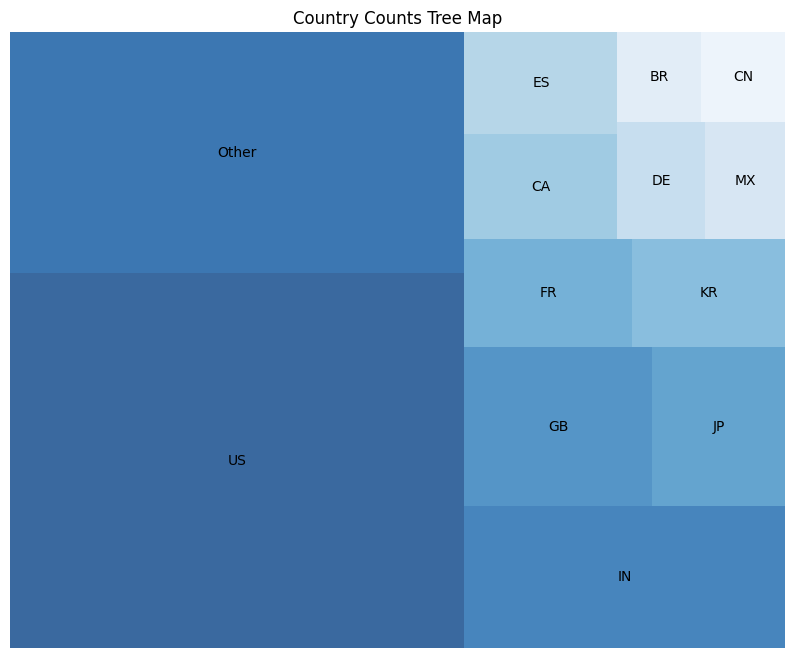

In [14]:
import matplotlib.pyplot as plt
import squarify

df = pd.DataFrame(new_country_counts.items(), columns=['Country', 'Count'])
df = df.sort_values(by='Count', ascending=False)

# 创建Tree Map
plt.figure(figsize=(10, 8))
squarify.plot(sizes=df['Count'], label=df['Country'], alpha=0.8, color=sns.color_palette('Blues_r', n_colors=len(df)))
# 设置标题
plt.title('Country Counts Tree Map')

# 显示Tree Map
plt.axis('off')
plt.show()


In [15]:
def fix_countries(countries):
    if len(countries) > 1:
        target_country = max(country_counts, key=country_counts.get)
        return [target_country]
    elif len(countries) == 0:
        return ['Other']
    else:
        return countries


titles_clean['production_countries'] = titles_clean['production_countries'].apply(fix_countries)

country_counts = titles_clean['production_countries'].value_counts()
threshold = 100
set_other = [key for key, value in country_counts.items() if value < threshold]

titles_clean['production_countries'] = titles_clean['production_countries'].apply(lambda x: ['Other'] if x in set_other else x)

titles_clean


,id,title,type,description,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,...,genre_history,genre_horror,genre_music,genre_reality,genre_romance,genre_scifi,genre_sport,genre_thriller,genre_war,genre_western
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"[drama, crime]",[US],8.200000,808582.000000,...,0,0,0,0,0,0,0,0,0,0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"[drama, action, thriller, european]",[US],7.700000,107673.000000,...,0,0,0,0,0,0,0,1,0,0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"[fantasy, action, comedy]",[GB],8.200000,534486.000000,...,0,0,0,0,0,0,0,0,0,0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"[war, action]",[US],7.700000,72662.000000,...,0,0,0,0,0,0,0,0,1,0
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,30,"[comedy, european]",[GB],8.800000,73424.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,100,"[romance, drama]",[Other],6.800000,45.000000,...,0,0,0,0,1,0,0,0,0,0
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,134,[drama],[Other],7.700000,348.000000,...,0,0,0,0,0,0,0,0,0,0
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,90,[comedy],[Other],3.800000,68.000000,...,0,0,0,0,0,0,0,0,0,0
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,37,[],[US],6.433333,15655.066667,...,0,0,0,0,0,0,0,0,0,0


# Credit

In [16]:
credit.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [17]:
titles_clean.head()

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,...,genre_history,genre_horror,genre_music,genre_reality,genre_romance,genre_scifi,genre_sport,genre_thriller,genre_war,genre_western
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"[drama, crime]",[US],8.2,808582.0,...,0,0,0,0,0,0,0,0,0,0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"[drama, action, thriller, european]",[US],7.7,107673.0,...,0,0,0,0,0,0,0,1,0,0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"[fantasy, action, comedy]",[GB],8.2,534486.0,...,0,0,0,0,0,0,0,0,0,0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"[war, action]",[US],7.7,72662.0,...,0,0,0,0,0,0,0,0,1,0
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,30,"[comedy, european]",[GB],8.8,73424.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
merged_df = pd.merge(titles_clean, credit, on='id', how='inner')
actors_list = merged_df.groupby('id')['person_id'].agg(list).reset_index()
directors_list = merged_df[merged_df['role']=='DIRECTOR'].groupby('id')['person_id'].agg(list).reset_index()
show_df = pd.merge(titles_clean, actors_list, on='id', how='left')
show_df = pd.merge(show_df, directors_list, on='id', how='left')

show_df

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,...,genre_music,genre_reality,genre_romance,genre_scifi,genre_sport,genre_thriller,genre_war,genre_western,person_id_x,person_id_y
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"[drama, crime]",[US],8.200000,808582.000000,...,0,0,0,0,0,0,0,0,"[3748, 14658, 7064, 3739, 48933, 32267, 519612...",[3308]
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"[drama, action, thriller, european]",[US],7.700000,107673.000000,...,0,0,0,0,0,1,0,0,"[10103, 13020, 6639, 11224, 24509, 80069, 8403...",[17727]
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"[fantasy, action, comedy]",[GB],8.200000,534486.000000,...,0,0,0,0,0,0,0,0,"[11472, 1549, 11474, 11473, 11475, 11476, 4089...","[11475, 11473]"
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"[war, action]",[US],7.700000,72662.000000,...,0,0,0,0,0,0,1,0,"[35196, 1050, 16868, 14351, 35197, 35200, 1061...",[1063]
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,30,"[comedy, european]",[GB],8.800000,73424.000000,...,0,0,0,0,0,0,0,0,"[11472, 11476, 11475, 11474, 11473]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,100,"[romance, drama]",[Other],6.800000,45.000000,...,0,0,1,0,0,0,0,0,"[269015, 2151684, 361605, 1018894, 618764, 678...",[1962840]
5756,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,134,[drama],[Other],7.700000,348.000000,...,0,0,0,0,0,0,0,0,NaN,NaN
5757,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,90,[comedy],[Other],3.800000,68.000000,...,0,0,0,0,0,0,0,0,"[1950442, 164248, 1402344, 369222, 369221, 368...",[1950416]
5758,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,37,[],[US],6.433333,15655.066667,...,0,0,0,0,0,0,0,0,NaN,NaN


# Analysis

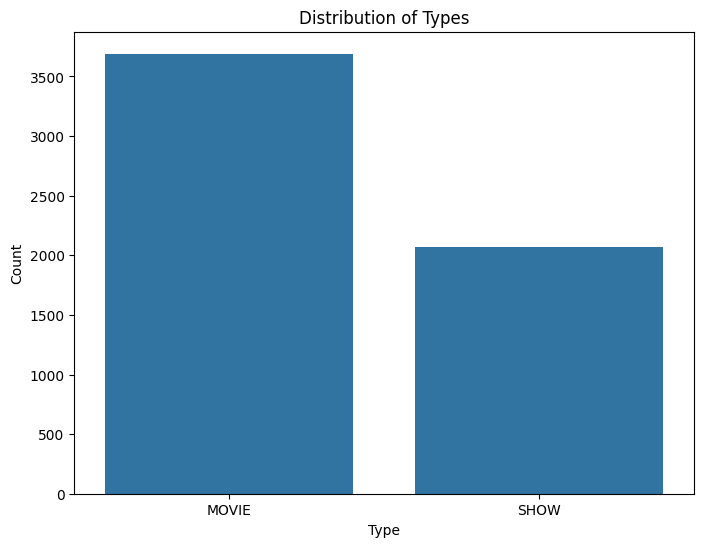

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=titles_clean, x='type')
plt.title('Distribution of Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

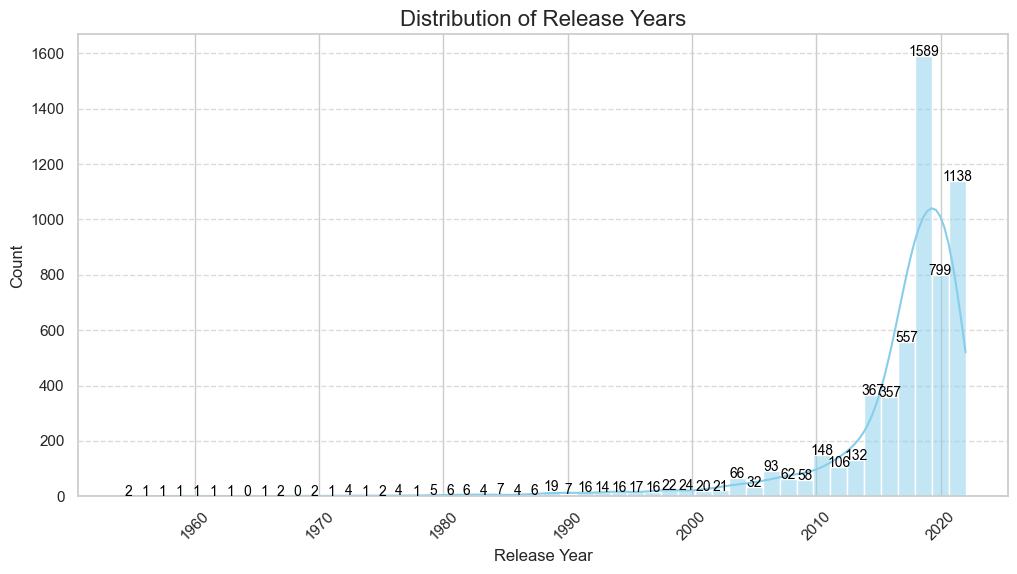

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.histplot(data=titles_clean, x='release_year', bins=50, kde=True, color='skyblue')

plt.title('Distribution of Release Years', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.xticks(rotation=45)


plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

# 显示图形
plt.show()

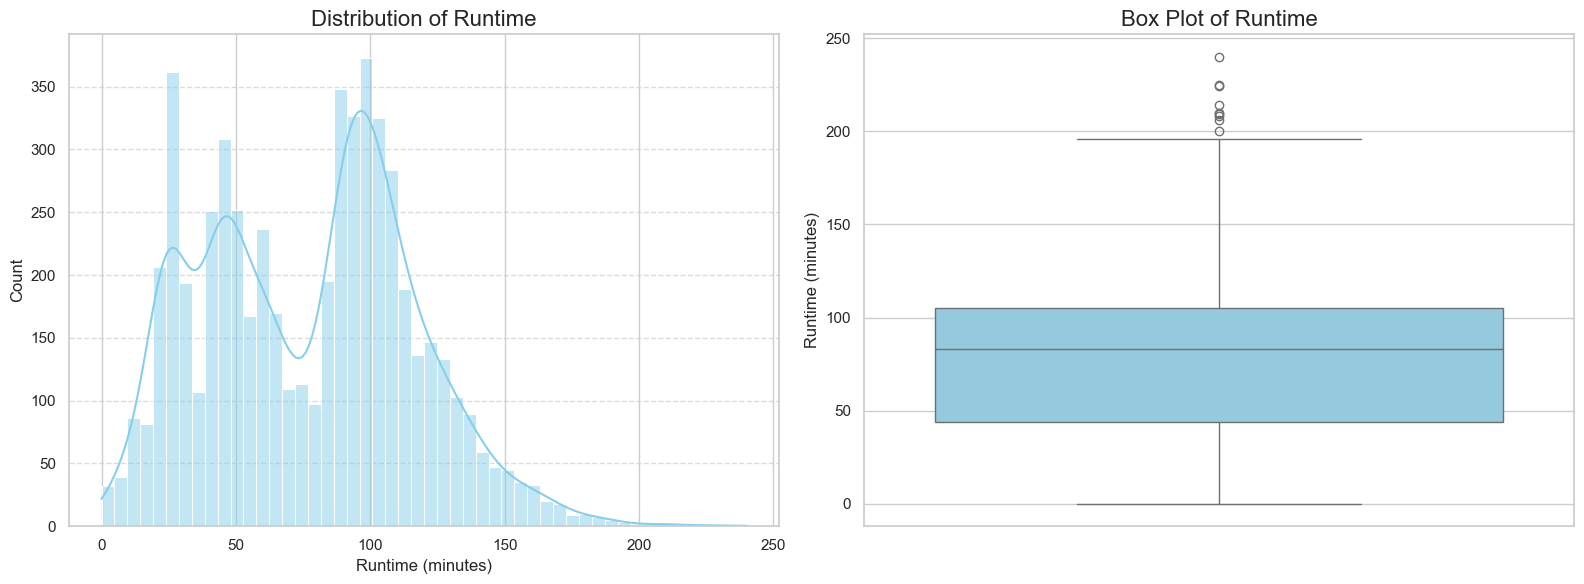

In [21]:

sns.set(style="whitegrid")

# 创建一个包含两个子图的图形
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 绘制 runtime 的分布图（直方图）
sns.histplot(data=titles_clean, x='runtime', bins=50, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Runtime', fontsize=16)
axes[0].set_xlabel('Runtime (minutes)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 绘制 runtime 的箱线图
sns.boxplot(data=titles_clean, y='runtime', color='skyblue', ax=axes[1])
axes[1].set_title('Box Plot of Runtime', fontsize=16)
axes[1].set_ylabel('Runtime (minutes)', fontsize=12)

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()


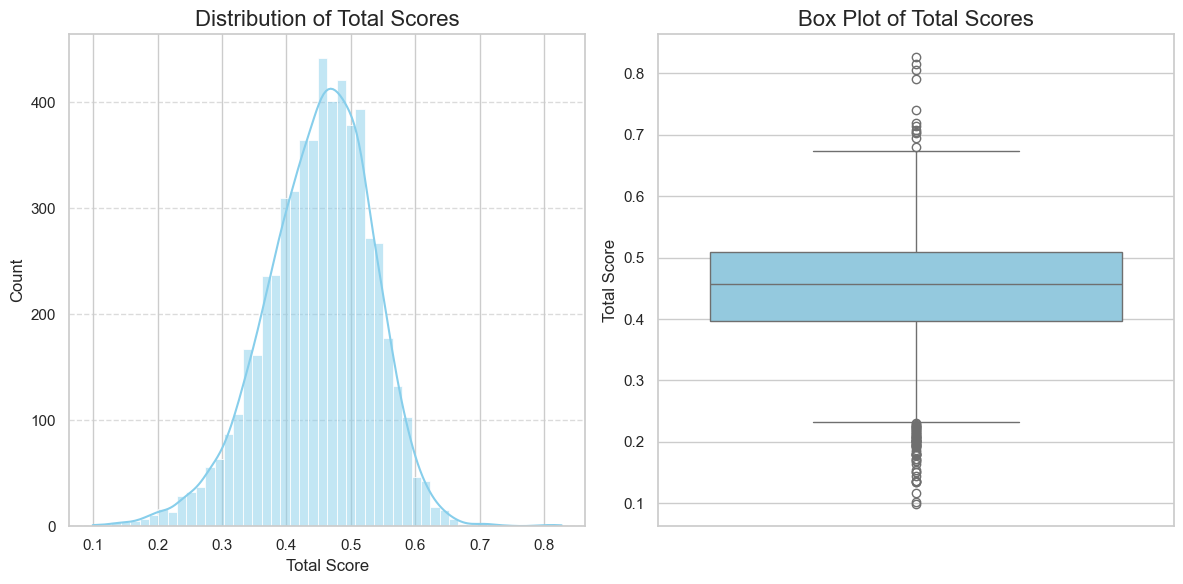

In [22]:

sns.set(style="whitegrid")

# 创建一个包含三个子图的图形
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# 绘制 total_score 的分布图（直方图和密度估计图）
sns.histplot(data=titles_clean, x='total_score', bins=50, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Total Scores', fontsize=16)
axes[0].set_xlabel('Total Score', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 绘制 total_score 的箱线图
sns.boxplot(data=titles_clean, y='total_score', color='skyblue', ax=axes[1])
axes[1].set_title('Box Plot of Total Scores', fontsize=16)
axes[1].set_ylabel('Total Score', fontsize=12)



# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()


# Text Processing

In [23]:
import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def preprocess_title(title):
    # Remove all non-alphabetic characters other than space characters
    title = re.sub(r'[^a-zA-Z\s]', '', title)
    
    # Convert all capital letters to lower case
    title = title.lower()
    
    # Tokenize each title into a list of words,
    words = title.split()
    
    return words
def preprocess (data):
    # Remove all non-alphabetic characters other than space characters
    alphabetic = re.sub(r'[^a-zA-Z\s]', '', data)
    # Convert all capital letters to lower case
    data = str(data).lower()
    # Tokenize each title into a list of words,
    words = word_tokenize(alphabetic)
    ban_word = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word) for word in words if word not in ban_word]
    text = ' '.join(tokens)
    
    return words

show_df['title'] = show_df['title'].apply(preprocess_title)
show_df['description'] = show_df['description'].apply(preprocess_title)

TypeError: expected string or bytes-like object

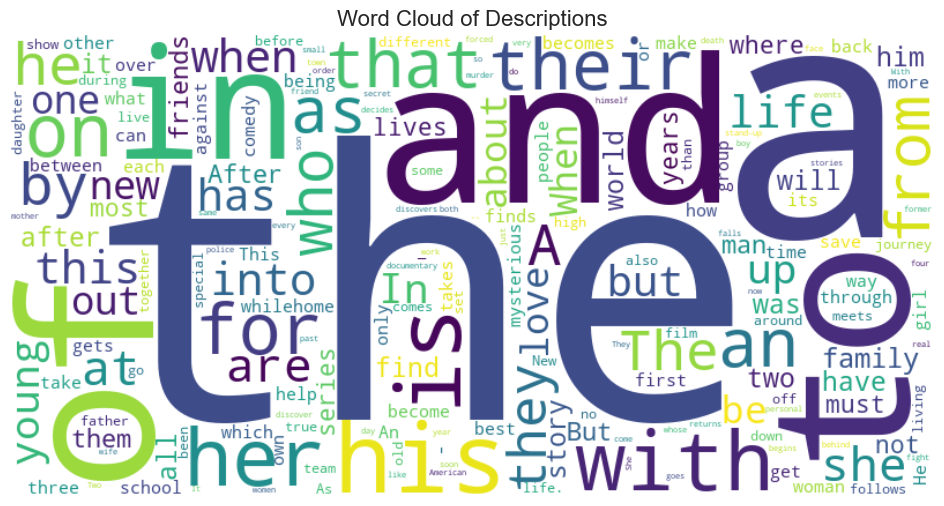

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# 假设您已经加载了 titles_clean DataFrame
# titles_clean = pd.read_csv('titles_clean.csv')

# 合并所有描述文本
all_descriptions = ' '.join(titles_clean['description'].astype(str))

# 使用空格分隔文本并计算词频
words = all_descriptions.split()
word_count = Counter(words)

# 绘制词云图
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)

# 创建图形
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Descriptions', fontsize=16)
plt.axis('off')
plt.show()


In [ ]:
from textblob import TextBlob

# 创建一个函数来获取描述文本的情感分析结果
def analyze_sentiment(description):
    analysis = TextBlob(description)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# 将情感分析结果应用于描述文本列
titles_clean['sentiment'] = titles_clean['description'].astype(str).apply(analyze_sentiment)

# 统计情感分析结果的分布
sentiment_counts = titles_clean['sentiment'].value_counts()

# 绘制情感分析结果的条形图
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments in Descriptions', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


ModuleNotFoundError: No module named 'textblob'

# Model training:

## Data combain and process
combain the cleaned credit data with cleaned title data.

In [27]:
# remove the useless features in the cleaned dataset
titles_analyise = titles_clean.drop(['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score','genres'], axis=1)

# filter the credit data to get the actors and directors data respectively
actors = credit[credit['role'] == 'ACTOR']
director = credit[credit['role'] == 'DIRECTOR']

# us id to group the actors and directors
grouped_actors = actors.groupby('id')['name'].apply(list).reset_index()
grouped_director = director.groupby('id')['name'].apply(list).reset_index()
# merge the actors and directors data from credit to the cleaned title dataset
merged_df = titles_analyise.merge(grouped_actors, on='id', how='left')
merged_df.rename(columns={'name': 'actors'}, inplace=True)
merged_df = merged_df.merge(grouped_director, on='id', how='left')
merged_df.rename(columns={'name': 'director'}, inplace=True)

# replace nah values with empty list
merged_df['actors'] = merged_df['actors'].apply(lambda x: x if isinstance(x, list) or pd.notna(x) else [])
merged_df['director'] = merged_df['director'].apply(lambda x: x if isinstance(x, list) or pd.notna(x) else [])

# replace country list to string for training
merged_df['production_countries'] = merged_df['production_countries'].apply(lambda x: ','.join([str(i) for i in x]))

# replace actors and director list to string for training
merged_df['actors'] = merged_df['actors'].apply(lambda x: ','.join([str(i) for i in x]))
merged_df['director'] = merged_df['director'].apply(lambda x: ','.join([str(i) for i in x]))
# output the cleaned dataset
merged_df

titles_clean.dtypes


id                             object
title                          object
type                           object
description                    object
release_year                    int64
runtime                         int64
genres                         object
production_countries           object
imdb_score                    float64
imdb_votes                    float64
tmdb_popularity               float64
tmdb_score                    float64
imdb_score_normalized         float64
imdb_votes_normalized         float64
tmdb_popularity_normalized    float64
tmdb_score_normalized         float64
total_score                   float64
genre_action                    uint8
genre_animation                 uint8
genre_comedy                    uint8
genre_crime                     uint8
genre_documentation             uint8
genre_drama                     uint8
genre_european                  uint8
genre_family                    uint8
genre_fantasy                   uint8
genre_histor

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split

# split the dataset into train and test dataset
train, test = train_test_split(merged_df, test_size=0.2)  # 80% training and 20% test

train_data = TabularDataset(train.drop(columns=['imdb_score_normalized','imdb_votes_normalized','tmdb_popularity_normalized','tmdb_score_normalized']))



/Users/autumn/opt/anaconda3/envs/ag/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Feature selection
Positive output means while the feature increase, the score while increase. Negative it the inverse of positive.

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
correlations = {}
for column in train.drop(columns=['total_score']):
    if train[column].dtype != 'object':  
        correlation, _ = pearsonr(train[column], train['total_score'])
        correlations[column] = correlation

# Rank the features by their correlation with total_score
sorted_features = sorted(correlations.keys(), key=lambda x: abs(correlations[x]), reverse=True)

# Print the feature and their correlation with total_score
for feature in sorted_features:
    print(f"{feature}: {correlations[feature]}")


imdb_score_normalized: 0.9214238326885483
tmdb_score_normalized: 0.8122768017679705
imdb_votes_normalized: 0.274276376694115
runtime: -0.20567437642750147
genre_documentation: 0.14668047121046457
genre_history: 0.10981245529660508
tmdb_popularity_normalized: 0.10813386487089331
genre_animation: 0.10010469782402091
genre_horror: -0.09971226265754721
genre_drama: 0.09859340281427287
genre_comedy: -0.08976656941654397
release_year: -0.08292081994078879
genre_war: 0.0763610827855146
genre_scifi: 0.07610080774094645
genre_thriller: -0.06695455338255371
genre_fantasy: 0.060456135279827614
genre_romance: -0.04900802158019188
genre_crime: 0.033259387888257844
genre_sport: 0.026971408431818555
genre_music: 0.019348461270919885
genre_european: -0.016967265998226393
genre_action: -0.0169008146976263
genre_reality: 0.01477378876996047
genre_western: 0.0009774443458787927
genre_family: 0.0003010807231568868


# Train model

In [ ]:
# use the autogluon to train the model, the predict label is total_score.
import lightgbm

id, lablel = 'id', 'total_score'
predictor = TabularPredictor(label=lablel).fit(train_data.drop(columns=[id]))


No path specified. Models will be saved in: "AutogluonModels/ag-20231002_054457/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231002_054457/"
AutoGluon Version:  0.8.2
Python Version:     3.8.18
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 23.0.0: Fri Sep 15 14:41:43 PDT 2023; root:xnu-10002.1.13~1/RELEASE_ARM64_T6000
Disk Space Avail:   12.41 GB / 494.38 GB (2.5%)
Train Data Rows:    4608
Train Data Columns: 27
Label Column: total_score
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.8147269413124615, 0.10244006524277638, 0.44971, 0.08357)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Usi

# Model evaluation

## data Valiadation


In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# define the evaluation metrics
mse_scores = []
rmse_scores = []
mae_scores = []

# define the cross validation method
m = 5 
kf = KFold(n_splits=m, shuffle=True, random_state=42)

label = 'total_score'
id = 'id'

# split the dataset into train and test dataset
for train_index, test_index in kf.split(merged_df):
    train, test = merged_df.iloc[train_index], merged_df.iloc[test_index]
    
    train_data = TabularDataset(train.drop(columns=['imdb_score_normalized','imdb_votes_normalized','tmdb_popularity_normalized','tmdb_score_normalized']))
    predictor = TabularPredictor(label=label).fit(train_data.drop(columns=[id]))
    
    test_data = test.drop(columns=[label,'imdb_score_normalized','imdb_votes_normalized','tmdb_popularity_normalized','tmdb_score_normalized'])
    y_true = test[label].values
    y_pred = predictor.predict(test_data)

    # calculate the evaluation metrics
    mse_scores.append(mean_squared_error(y_true, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_true, y_pred)))
    mae_scores.append(mean_absolute_error(y_true, y_pred))

# print the evaluation metrics
print(f"Average MSE: {np.mean(mse_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average MAE: {np.mean(mae_scores)}")


No path specified. Models will be saved in: "AutogluonModels/ag-20231002_050637/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231002_050637/"
AutoGluon Version:  0.8.2
Python Version:     3.8.18
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 23.0.0: Fri Sep 15 14:41:43 PDT 2023; root:xnu-10002.1.13~1/RELEASE_ARM64_T6000
Disk Space Avail:   13.81 GB / 494.38 GB (2.8%)
Train Data Rows:    4608
Train Data Columns: 27
Label Column: total_score
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.8272316025486952, 0.10244006524277638, 0.45101, 0.08321)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Usi

Average MSE: 0.004642921017959064
Average RMSE: 0.06813754068154478
Average MAE: 0.05227599278164059


# Testing

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

import numpy as np

# Predict on test data
y_pred = predictor.predict(test.drop(columns=['imdb_score_normalized', 'imdb_votes_normalized', 'tmdb_popularity_normalized', 'tmdb_score_normalized']))
y_true = test['total_score'].values

# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")


MSE: 0.004755510744169758
RMSE: 0.06896021131181196
MAE: 0.05309724704208821
R^2: 0.32478208808333764


# Data visualization

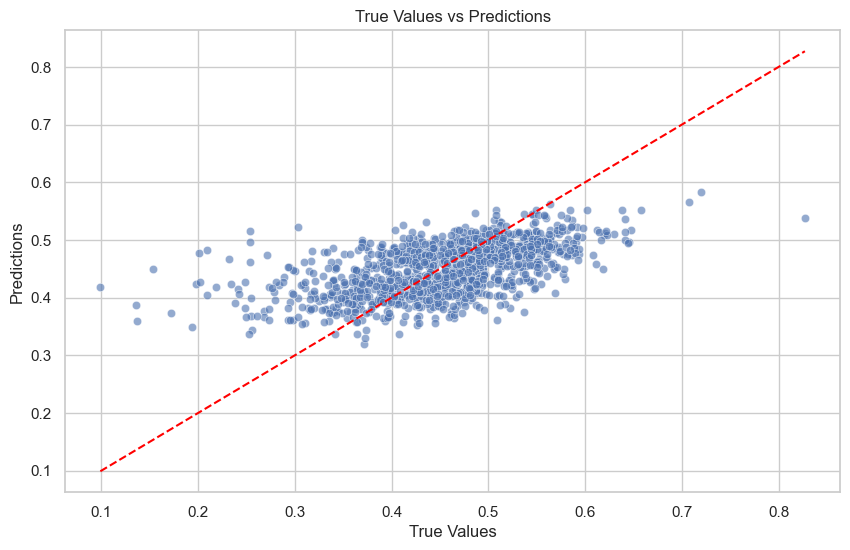

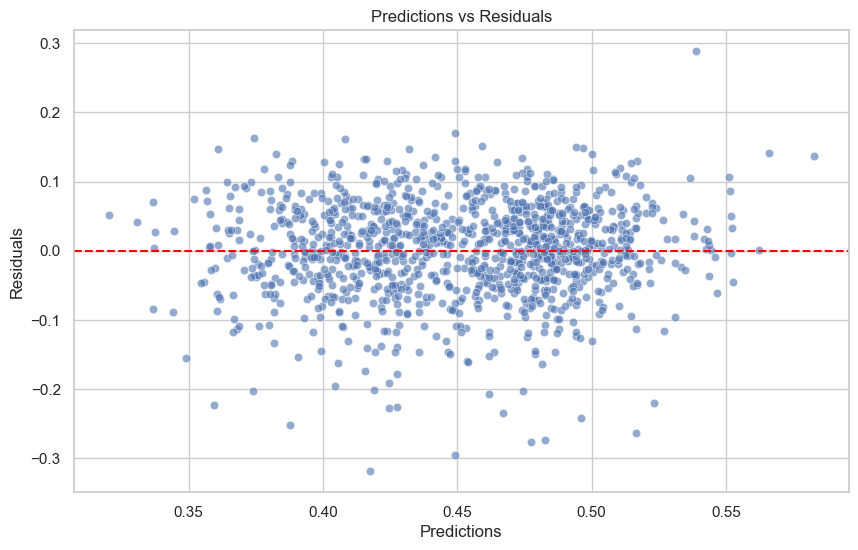

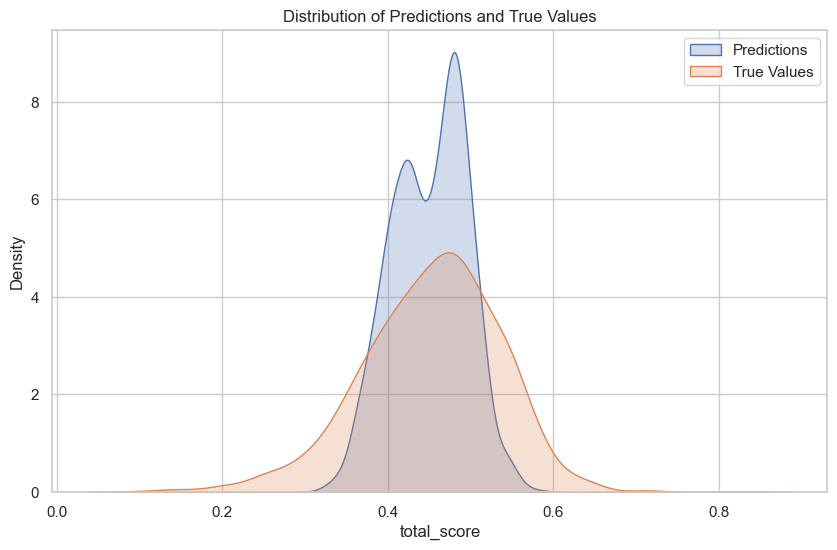

These features in provided data are not utilized by the predictor and will be ignored: ['id', 'imdb_score_normalized', 'imdb_votes_normalized', 'tmdb_popularity_normalized', 'tmdb_score_normalized']
Computing feature importance via permutation shuffling for 27 features using 1152 rows with 5 shuffle sets...
	47.05s	= Expected runtime (9.41s per shuffle set)
	26.4s	= Actual runtime (Completed 5 of 5 shuffle sets)


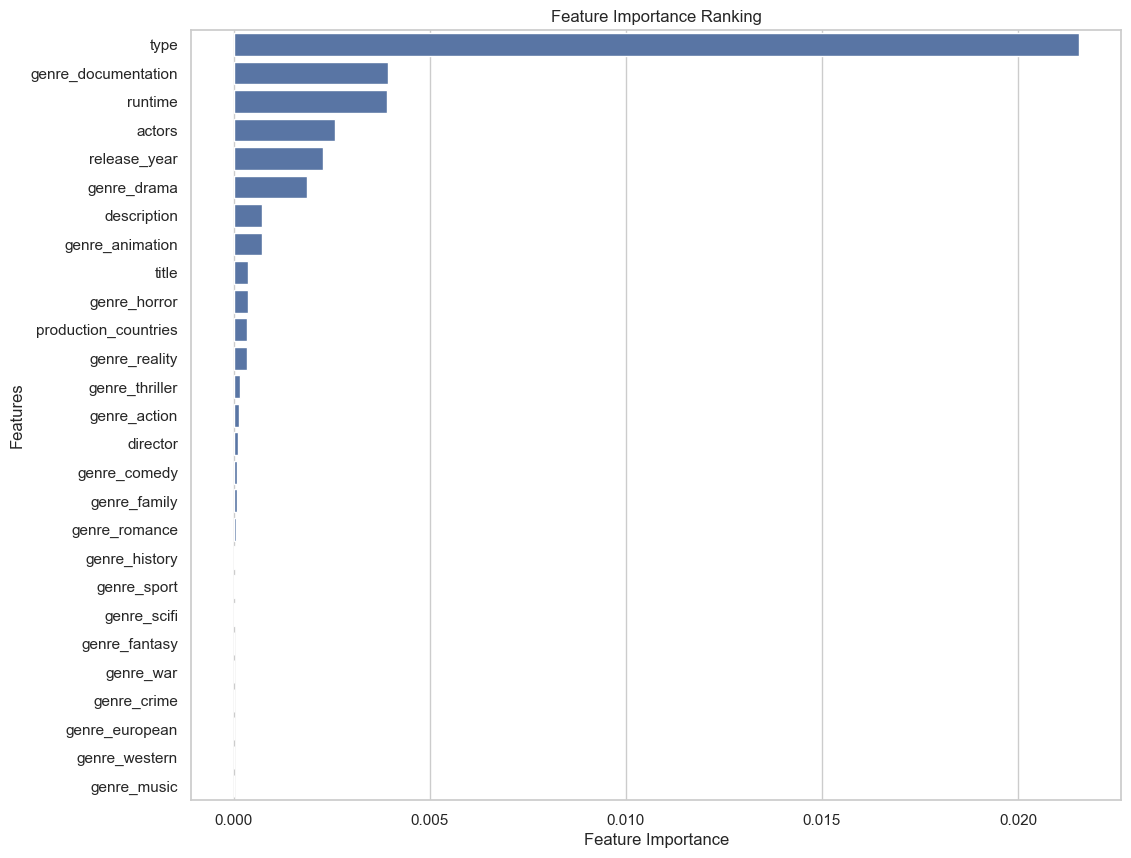

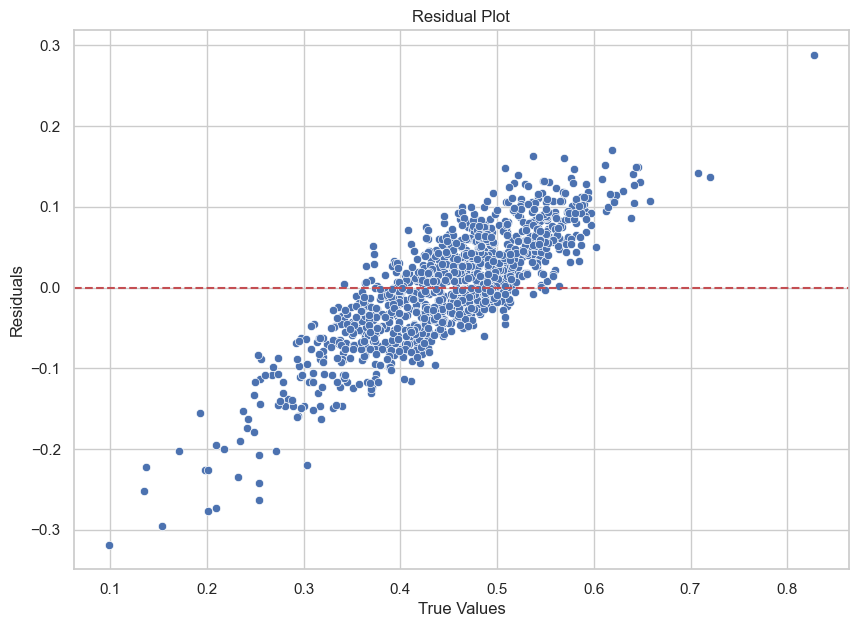

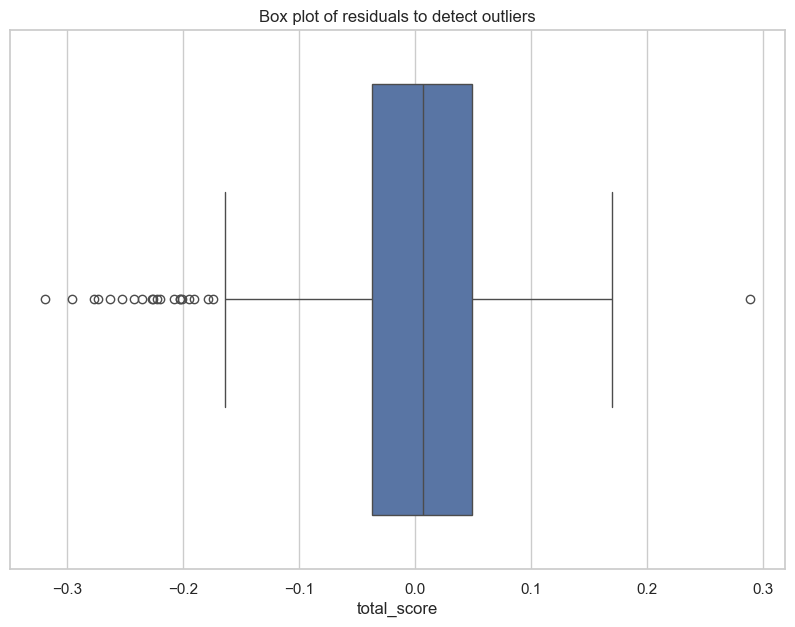

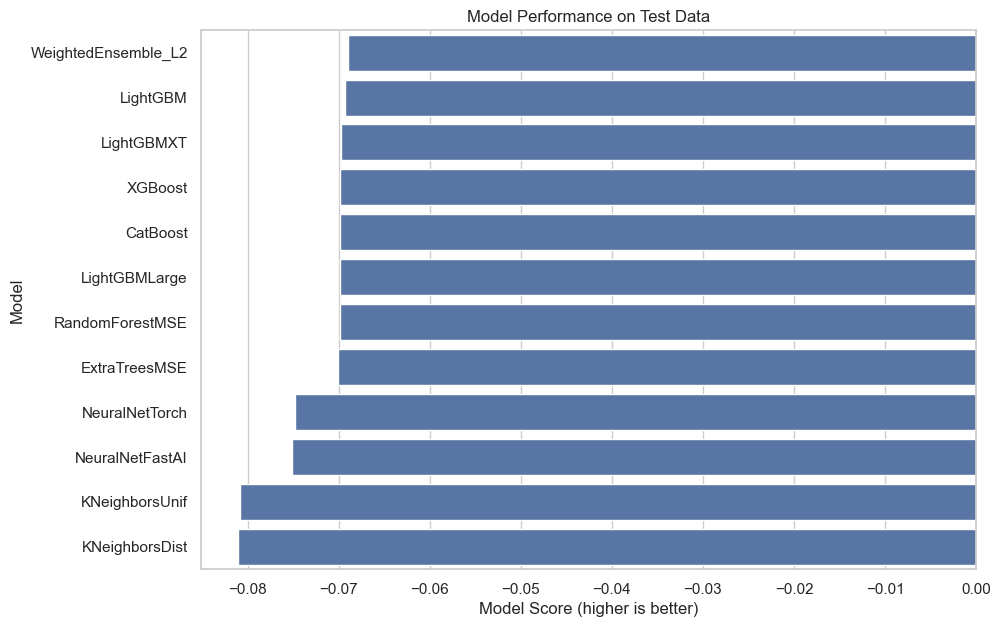

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
plt.show()

# Residual Plot
residuals = y_true - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Predictions vs Residuals')
plt.show()

# Distribution Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred, label="Predictions", fill=True)  
sns.kdeplot(y_true, label="True Values", fill=True) 
plt.title('Distribution of Predictions and True Values')
plt.legend()
plt.show()

# Feature Importance
feature_importance = predictor.feature_importance(data=test)
plt.figure(figsize=(12, 10))
sns.barplot(x=feature_importance['importance'], y=feature_importance.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.show()

predictions = predictor.predict(test)
residuals = test[lablel] - predictions
plt.figure(figsize=(10, 7))
sns.scatterplot(x=test[lablel], y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Box Plot of residuals
plt.figure(figsize=(10, 7))
sns.boxplot(x=residuals)
plt.title('Box plot of residuals to detect outliers')
plt.show()

# Model performance on test data
leaderboard = predictor.leaderboard(test, silent=True)
plt.figure(figsize=(10, 7))
sns.barplot(x='score_test', y='model', data=leaderboard)  
plt.xlabel('Model Score (higher is better)')
plt.ylabel('Model')
plt.title('Model Performance on Test Data')
plt.show()
